In [1]:
import sys
import os
from pathlib import Path
# Get the absolute path to the repository root
repo_root = Path.cwd().parent.absolute()  # Assuming notebook is in tests dir
# Add the repository root to the Python path
sys.path.insert(0, str(repo_root))

# IMPORT MODULES

In [2]:
import dambuhala.breach as bc
import dambuhala.hydrograph as hg

# Test 01
1. Wang et al (2018) empirical equation for peak discharge [commit ee92dd2](https://github.com/ricsatjr/dambuhala/commit/ee92dd25f4f92dab44e1eed9f9e832e35150b4e9)
2. Generation of hydrograph from empirical equation and beta distribution [commit 4a9d6f8](https://github.com/ricsatjr/dambuhala/commit/4a9d6f88752402e6b6763af82858c61fec71ea23)

TOTAL WATER VOLUME (m^3): 35706600.0
PEAK DISCHARGE (m^3/s): 2276.5465621175376
(a,b)		duration	sum of volume slices
(4.84, 5.03) 	 10.65 		 35706567.81919645
(3.85, 4.86) 	 10.07 		 35706608.31287304
(3.24, 8.73) 	 13.91 		 35706361.68018151
(2.51, 7.78) 	 13.73 		 35706712.48358445
(2.76, 9.45) 	 15.38 		 35706654.330717176


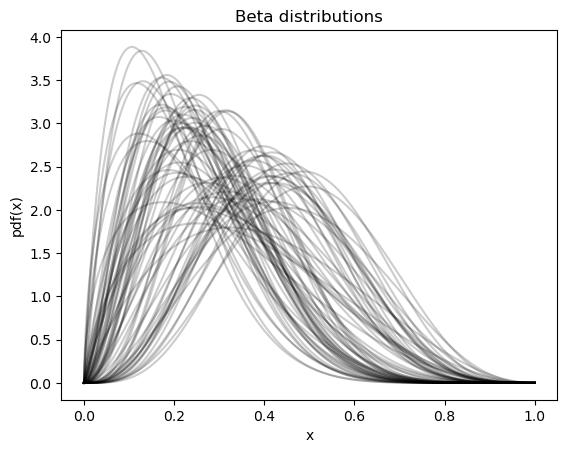

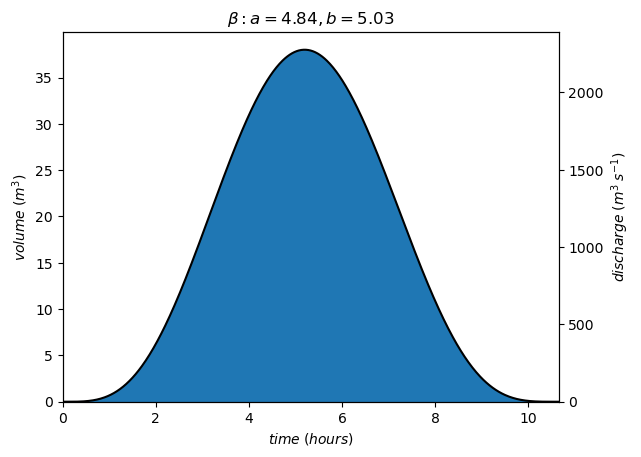

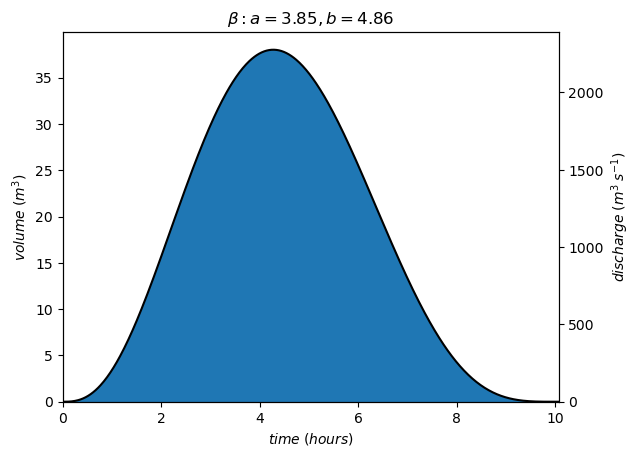

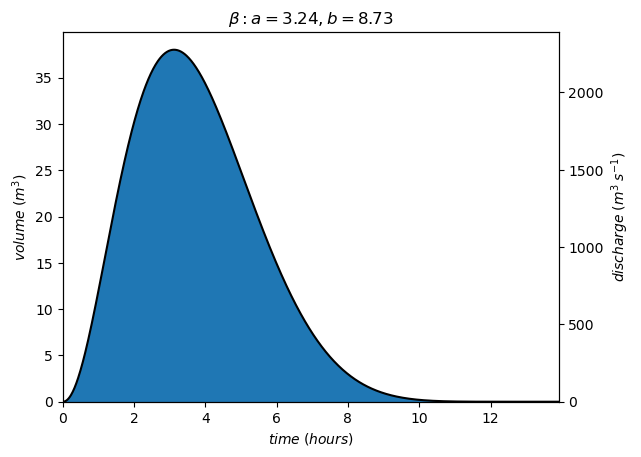

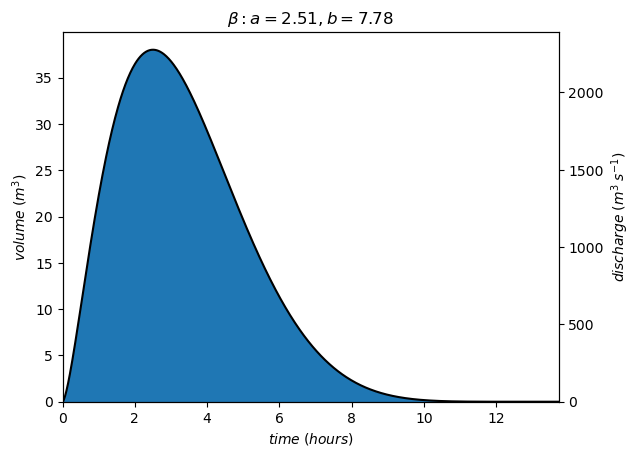

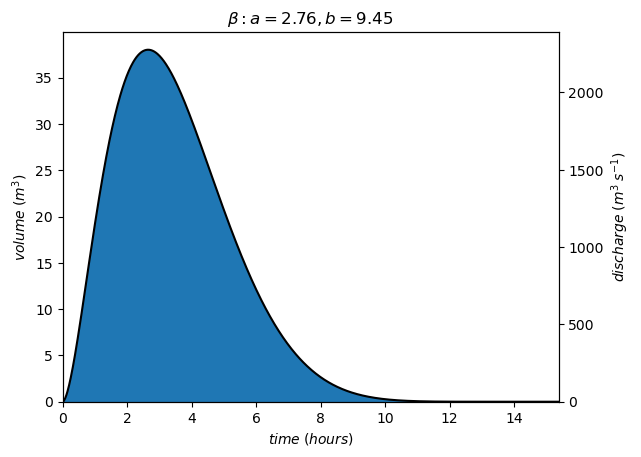

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Use Wang et al (2018) empirical equation to compute peak discharge from volume and heigh of water above breach
Vw=35706600.0
Hw=50
Qp=bc.wang_etal_2018_eq4(Vw,Hw)


#initialize hydrograph
dt=1/60          # set target time step for hydrograph, in hours
minpeakloc=0.1   # set location limits of hydrograph peak
maxpeakloc=0.5   # set location limits of hydrograph peak
plt.close("all")
beta_hg=hg.hydrograph_BetaDist(Vw,Qp,dt,minpeakloc=minpeakloc,maxpeakloc=maxpeakloc,show_betas=True)
print(f'TOTAL WATER VOLUME (m^3): {beta_hg.Vw}')
print(f'PEAK DISCHARGE (m^3/s): {beta_hg.Qp}')
print(f'(a,b)\t\tduration\tsum of volume slices')
for p in beta_hg.valid_beta_params[:min(5,len(beta_hg.valid_beta_params))]:
    t,q,v=beta_hg.make_hydrograph(p[0],p[1],plot=True)
    print((float(p[0]),float(p[1])),"\t",np.round(beta_hg.T,2),"\t\t",np.sum(beta_hg.v))
  